<a href="https://colab.research.google.com/github/maryawamaitha/MaryaData_Science-Projects-Portfolio/blob/main/HeartDiseaseLogistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn import metrics

In [81]:
df=pd.read_csv('/content/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [82]:
df.shape

(4238, 16)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


There are missing values in the datasets

Showing the columns with missing values

In [84]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Looking at the numerical columns

In [85]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


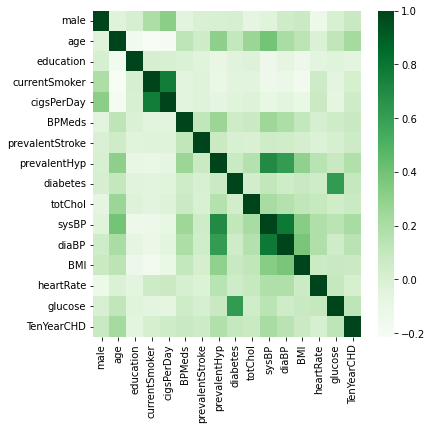

In [86]:
corr= df.corr()
plt.figure(figsize=[6,6])
sns.heatmap(corr,cmap='Greens');

Based on the heatmap, there is a correlation between the cigs per Day and current Smoker
- Relationshp between glucose and diabetes; 
- Relationship between sysBP and dialBP

#Prepare Data for Modelling

The target in this dataset is to predict Ten Year CHD

In [87]:
X=df.drop(columns='TenYearCHD')
y=df['TenYearCHD']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

To show all columns that are Numerical variables

In [89]:
num_feat = make_column_selector(dtype_include = 'number')
num_feat(X_train)

['male',
 'age',
 'education',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

- Since there are many missing values, simple imputer will be used to fill the missing values.
- For the numerical values - since the Age column has missing values, using a mean would give unusual value such as '45.5', this cannot be someone's age. Hence the median strategy will be used

In [90]:
median_imputer = SimpleImputer(strategy='median')

In [91]:
scaler=StandardScaler()
num_processor = make_pipeline(median_imputer, scaler)
num_tuple = (num_processor, num_feat)

In [92]:
col_transformer = make_column_transformer(num_tuple, remainder='passthrough')
col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa42557b7d0>)])

#Logistic Regression Model

In [110]:
logreg = LogisticRegression()
logreg_pipe = make_pipeline(col_transformer, logreg)

logreg_pipe.fit(X_train,y_train)
# predictions=logreg_pipe.predict(X_test)
print('LogReg Accuracy score Training set:', logreg_pipe.score(X_train, y_train))
print('LogReg Accuracy score Test set:',logreg_pipe.score(X_test, y_test))

LogReg Accuracy score Training set: 0.8574575204531152
LogReg Accuracy score Test set: 0.8462264150943396


In [94]:
logreg_pipe.get_params()

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('pipeline',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='median')),
                                                  ('standardscaler',
                                                   StandardScaler())]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa42557b7d0>)]),
 'columntransformer__n_jobs': None,
 'columntransformer__pipeline': Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 'columntransformer__pipeline__memory': None,
 'columntransformer__pipeline__simpleimputer': SimpleImputer(strategy='median'),
 'columntransformer__pipeline__simpleimputer__add_indicator': False,
 'columntransformer__pipeline__simpleimputer__copy': True,
 'columntransformer__pi

In [115]:
lg_params = {'logisticregression__penalty':['l2'],
            'logisticregression__solver': ['lbfgs','liblinear'],
             'logisticregression__C': [100, 500, 1000],
              'logisticregression__random_state':[42]}

In [116]:
from sklearn.model_selection import GridSearchCV
lg_gs = GridSearchCV(logreg_pipe, lg_params)

lg_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fa42557b7d0>)])),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logis

In [117]:
lg_gs.best_params_

{'logisticregression__C': 100,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': 42,
 'logisticregression__solver': 'lbfgs'}

In [120]:
print('The Best LogReg Accuracy score Test set:',accuracy_score(y_train, lg_gs.predict(X_train)))
print('The Best LogReg Accuracy score Test set:',accuracy_score(y_test, lg_gs.predict(X_test)))

The Best LogReg Accuracy score Test set: 0.8574575204531152
The Best LogReg Accuracy score Test set: 0.8462264150943396
